In [52]:
#1. data cleanig
# step 1.1 basic of the project to read the dataset
import pandas as pd
df=pd.read_csv('coffeeQuality.csv')
df.head()


,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [53]:
# step 1.2 explore the data types using descriptive stat analaysis
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1338 non-null   float64
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [54]:
#step 1.3
#number of bags columns as convert into "int" after null value fill by median
df['Number.of.Bags'] = df['Number.of.Bags'].fillna(df['Number.of.Bags'].median())
df['Number.of.Bags'] = df['Number.of.Bags'].astype('Int64')
df
df.to_csv('coffeeQuality_cleaned.csv', index=False)

In [55]:
#STEP 1.4
df['Bag.Weight'] = (
    df['Bag.Weight']
    .astype(str)                # make sure all are strings
    .str.extract(r'(\d+\.?\d*)') # extract numeric part (e.g., "69.5" from "69.5 kg")
    .astype(float)              # convert to float
)
df.info()
df.to_csv('coffeeQuality_cleaned.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1180 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   Int64  
 13  Bag.Weight             1339 non-null   float64
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [56]:
#step 1.5
# === 2. Altitude Range ===
df['altitude_range_meters'] = df['altitude_high_meters'] - df['altitude_low_meters']
print("Altitude Range:\n", df[['altitude_low_meters', 'altitude_high_meters', 'altitude_range_meters']].head(), "\n")
df.to_csv('coffeeQuality_cleaned.csv', index=False)

Altitude Range:
    altitude_low_meters  altitude_high_meters  altitude_range_meters
0               1950.0                2200.0                  250.0
1               1950.0                2200.0                  250.0
2               1600.0                1800.0                  200.0
3               1800.0                2200.0                  400.0
4               1950.0                2200.0                  250.0 



In [57]:
#step 1.6
# === 1. Average Altitude ===
df['altitude_avg_meters'] = (df['altitude_low_meters'] + df['altitude_high_meters']) / 2
print("Average Altitude:\n", df[['altitude_low_meters', 'altitude_high_meters', 'altitude_avg_meters']].head(), "\n")
df.to_csv('coffeeQuality_cleaned.csv', index=False)

Average Altitude:
    altitude_low_meters  altitude_high_meters  altitude_avg_meters
0               1950.0                2200.0               2075.0
1               1950.0                2200.0               2075.0
2               1600.0                1800.0               1700.0
3               1800.0                2200.0               2000.0
4               1950.0                2200.0               2075.0 



In [58]:
#step 1.7
# === 5. Species vs. Quality Difference ===
species_quality = df.groupby('Species')['Total.Cup.Points'].transform('mean')
df['species_quality_diff'] = df['Total.Cup.Points'] - species_quality
print("Species Quality Difference:\n", df[['Species', 'Total.Cup.Points', 'species_quality_diff']].head(), "\n")
df.to_csv('coffeeQuality_cleaned.csv', index=False)


Species Quality Difference:
    Species  Total.Cup.Points  species_quality_diff
0  Arabica             90.58              8.464073
1  Arabica             89.92              7.804073
2  Arabica             89.75              7.634073
3  Arabica             89.00              6.884073
4  Arabica             88.83              6.714073 



In [59]:
#step 1.8
#number of bags columns as convert into "int" after null value fill by median
df['Number.of.Bags'] = df['Number.of.Bags'].fillna(df['Number.of.Bags'].median())

# Then convert to Int64 type
df['Number.of.Bags'] = df['Number.of.Bags'].astype('Int64')

df
df.to_csv('coffeeQuality_cleaned.csv', index=False)

In [60]:
#step 1.9
#the float data type missing value as fill (fillna)
fill_float = ['Quakers', 'altitude_low_meters', 
              'altitude_high_meters',
              'altitude_mean_meters']
for j in fill_float:
    df[j] = df[j].fillna(df[j].mean())
df
df.to_csv('coffeeQuality_cleaned.csv', index=False)

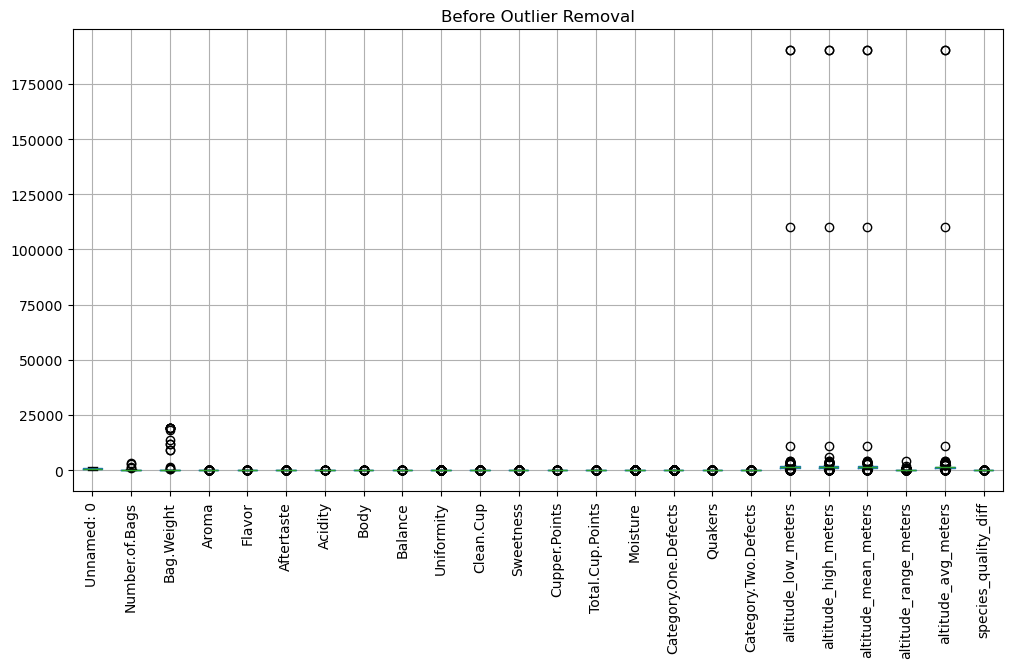

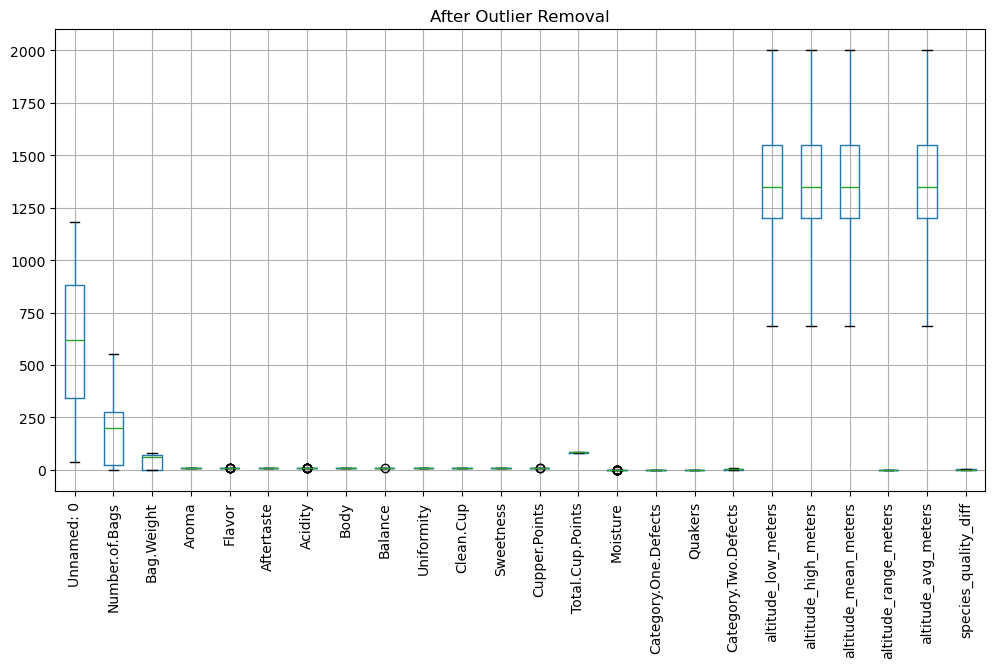

After removing outliers: (407, 47)


In [61]:
#step 1.10
#removeing outlier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
# Boxplot before removing outliers 
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("Before Outlier Removal")
plt.xticks(rotation=90)
plt.show()
#Remove outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#Boxplot after removing outliers
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.title("After Outlier Removal")
plt.xticks(rotation=90)
plt.show()

# Print shape after cleaning
print("After removing outliers:", df.shape)

# Save the cleaned data
df.to_csv('coffeeQuality_cleaned.csv', index=False)


In [62]:
#STEP 1.11
#to find any columns having special char 
import re
# Function to detect special characters in cell values
def has_special_char(value):
    if pd.isnull(value):
        return False
    # Only allow letters, numbers, spaces, dot, comma, colon, dash
    return bool(re.search(r"[^\w\s.,:-]", str(value)))

# Check each object column for special characters
columns_with_special_chars = []

for col in df.select_dtypes(include='object').columns:
    if df[col].apply(has_special_char).any():
        columns_with_special_chars.append(col)

# Output the result
if columns_with_special_chars:
    print("Columns where values contain special characters:")
    for col in columns_with_special_chars:
        print(f" - {col}")
else:
    print("No special characters found in any column values.")


Columns where values contain special characters:
 - Owner
 - Farm.Name
 - Lot.Number
 - Mill
 - ICO.Number
 - Company
 - Altitude
 - Producer
 - Harvest.Year
 - Owner.1
 - Processing.Method


In [63]:
#STEP 1.12
#to remove that special char from having columns
# Columns to clean
cols = [
    'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number', 'Mill', 'ICO.Number',
    'Company', 'Altitude', 'Region', 'Producer', 'In.Country.Partner',
    'Harvest.Year', 'Owner.1', 'Processing.Method', 'Certification.Body','Variety','Color'
]

# Clean special characters
for col in cols:
    df[col] = df[col].astype(str).str.replace(r'[^\w\s.,:-]', '', regex=True)

# Save cleaned file
df.to_csv("cleaned_coffee_data.csv", index=False)

print("Cleaned and saved as 'cleaned_coffee_data.csv'")


Cleaned and saved as 'cleaned_coffee_data.csv'


In [64]:
#STEP 1.13
# check the special char remove or not
# Same list of columns we cleaned
columns_to_check = [
    'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number', 'Mill', 'ICO.Number',
    'Company', 'Altitude', 'Region', 'Producer', 'In.Country.Partner',
    'Harvest.Year', 'Owner.1', 'Processing.Method', 'Certification.Body'
]

# Function to detect special characters (excluding allowed ones)
def has_special_char(text):
    if pd.isnull(text):
        return False
    return bool(re.search(r'[^\w\s.,:-]', str(text)))

# Check which columns still have special characters
columns_with_special_chars = []

for col in columns_to_check:
    if col in df.columns:
        if df[col].apply(has_special_char).any():
            columns_with_special_chars.append(col)

# Print results
if columns_with_special_chars:
    print("Special characters still found in these columns:")
    for col in columns_with_special_chars:
        print(f" - {col}")
else:
    print(" No special characters found in the cleaned columns!")


 No special characters found in the cleaned columns!


In [65]:
#step 1.14
#fill the columns to using fillna
#fill the blanks columns using fill or bfill or else fillna
fill_obj=['Owner','Country.of.Origin','Farm.Name','Lot.Number','Mill','ICO.Number','Company','Altitude','Region','Producer','Harvest.Year','Owner.1','Variety','Processing.Method','Color']
for i in fill_obj:
    df[i]=df[i].ffill().bfill()
df
df.to_csv('coffeeQuality_cleaned.csv', index=False)

In [66]:
#STEP 1.15
columns_to_drop = [col for col in df.columns if (
    col.startswith("Unnamed") or
    col in ['Lot.Number', 'Mill', 'ICO.Number', 'Owner.1', 'Expiration', 'In.Country.Partner',
'Certification.Address', 'Certification.Contact', 'Certification.Body'])]
# Drop those columns
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
print("Removed columns:", columns_to_drop)
# Drop rows with missing values
df.dropna(inplace=True)
# Show the cleaned dataset
df.to_csv("coffeeQuality_cleaned.csv", index=False)
print(df.head())
df.to_csv('coffeeQuality_cleaned.csv', index=False)


Removed columns: ['Unnamed: 0', 'Lot.Number', 'Mill', 'ICO.Number', 'In.Country.Partner', 'Owner.1', 'Expiration', 'Certification.Body', 'Certification.Address', 'Certification.Contact']
    Species                      Owner Country.of.Origin       Farm.Name  \
35  Arabica                daniel magu             Kenya         kangunu   
44  Arabica              jungle estate             Kenya   jungle estate   
57  Arabica  juan luis alvarado romero         Guatemala      valparaiso   
58  Arabica  juan luis alvarado romero         Guatemala  finca el limon   
62  Arabica  atlantic specialty coffee       El Salvador     el majahual   

                      Company     Altitude         Region  \
35               c dorman ltd         1800        muranga   
44           keremara limited         1754          nyeri   
57                   sertrasa         5000     acatenango   
58                    unicafe         4650  nuevo oriente   
62  atlantic specialty coffee  1500 meters        a

In [67]:
#step 1.15.1
#check the columns are remove or not
df.columns


Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Company',
       'Altitude', 'Region', 'Producer', 'Number.of.Bags', 'Bag.Weight',
       'Harvest.Year', 'Grading.Date', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters', 'altitude_range_meters',
       'altitude_avg_meters', 'species_quality_diff'],
      dtype='object')

In [68]:
# STEP 1.15.2
#final check any null values
print(df.isnull().sum())
print("....................................................................")

Species                  0
Owner                    0
Country.of.Origin        0
Farm.Name                0
Company                  0
Altitude                 0
Region                   0
Producer                 0
Number.of.Bags           0
Bag.Weight               0
Harvest.Year             0
Grading.Date             0
Variety                  0
Processing.Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean.Cup                0
Sweetness                0
Cupper.Points            0
Total.Cup.Points         0
Moisture                 0
Category.One.Defects     0
Quakers                  0
Color                    0
Category.Two.Defects     0
unit_of_measurement      0
altitude_low_meters      0
altitude_high_meters     0
altitude_mean_meters     0
altitude_range_meters    0
altitude_avg_meters      0
species_quality_diff     0
d

In [69]:
# 2.EDA ANLAYSIS
# 2.1 import libary
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [70]:
"""# 2.2 UNIVARAIE CHARTS 
column_names = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance',
                'Uniformity','Clean.Cup','Sweetness','Cupper.Points',
                'Total.Cup.Points','Moisture']
chart_types = ['histplot', 'countplot', 'piechart']

for i in column_names:
    if i in df.columns:
        chart = random.choice(chart_types)
        plt.figure(figsize=(6, 4))

        if df[i].dtype in ['int64', 'float64']: 
            if chart == 'histplot':
                sns.histplot(df[i], kde=True, bins=20, color='red')
            elif chart == 'boxplot':
                sns.boxplot(x=df[i], color='orange')
            elif chart == 'piechar':
                sns.piechar(df[i], fill=True, color='green')
            else:
                sns.histplot(df[i], kde=True, bins=20, color='teal')  # fallback


        plt.title(f"{chart} of {i}")
        plt.tight_layout()
        plt.show()"""

'# 2.2 UNIVARAIE CHARTS \ncolumn_names = [\'Aroma\',\'Flavor\',\'Aftertaste\',\'Acidity\',\'Body\',\'Balance\',\n                \'Uniformity\',\'Clean.Cup\',\'Sweetness\',\'Cupper.Points\',\n                \'Total.Cup.Points\',\'Moisture\']\nchart_types = [\'histplot\', \'countplot\', \'piechart\']\n\nfor i in column_names:\n    if i in df.columns:\n        chart = random.choice(chart_types)\n        plt.figure(figsize=(6, 4))\n\n        if df[i].dtype in [\'int64\', \'float64\']: \n            if chart == \'histplot\':\n                sns.histplot(df[i], kde=True, bins=20, color=\'red\')\n            elif chart == \'boxplot\':\n                sns.boxplot(x=df[i], color=\'orange\')\n            elif chart == \'piechar\':\n                sns.piechar(df[i], fill=True, color=\'green\')\n            else:\n                sns.histplot(df[i], kde=True, bins=20, color=\'teal\')  # fallback\n\n\n        plt.title(f"{chart} of {i}")\n        plt.tight_layout()\n        plt.show()'

            Aroma      Flavor  Aftertaste     Acidity        Body     Balance  \
count  407.000000  407.000000  407.000000  407.000000  407.000000  407.000000   
mean     7.598894    7.550246    7.422654    7.556953    7.499386    7.509975   
std      0.228791    0.238917    0.246884    0.231212    0.208176    0.234526   
min      7.000000    6.830000    6.830000    6.750000    6.830000    6.830000   
25%      7.420000    7.420000    7.250000    7.420000    7.330000    7.330000   
50%      7.580000    7.580000    7.420000    7.580000    7.500000    7.500000   
75%      7.750000    7.750000    7.580000    7.670000    7.670000    7.670000   
max      8.170000    8.170000    8.000000    8.330000    8.170000    8.330000   

         Moisture  Total.Cup.Points  
count  407.000000        407.000000  
mean     0.112310         82.651990  
std      0.010624          1.352344  
min      0.080000         79.250000  
25%      0.110000         81.670000  
50%      0.110000         82.670000  
75% 

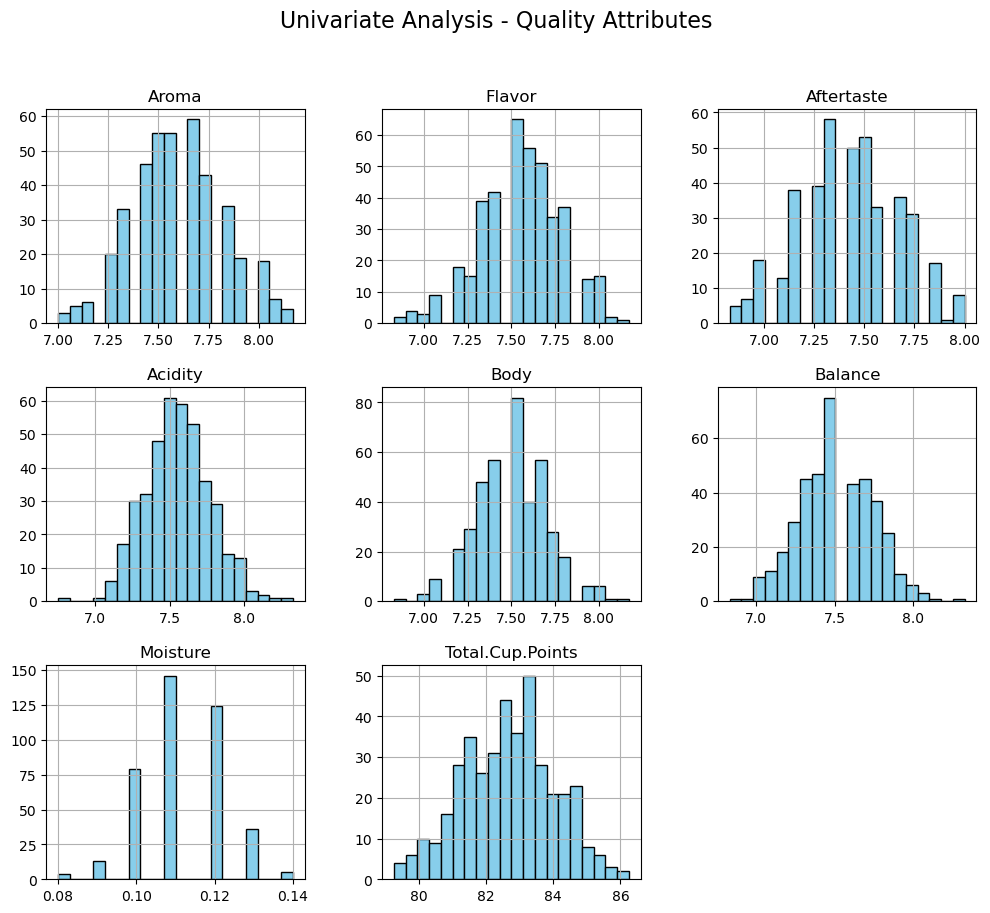

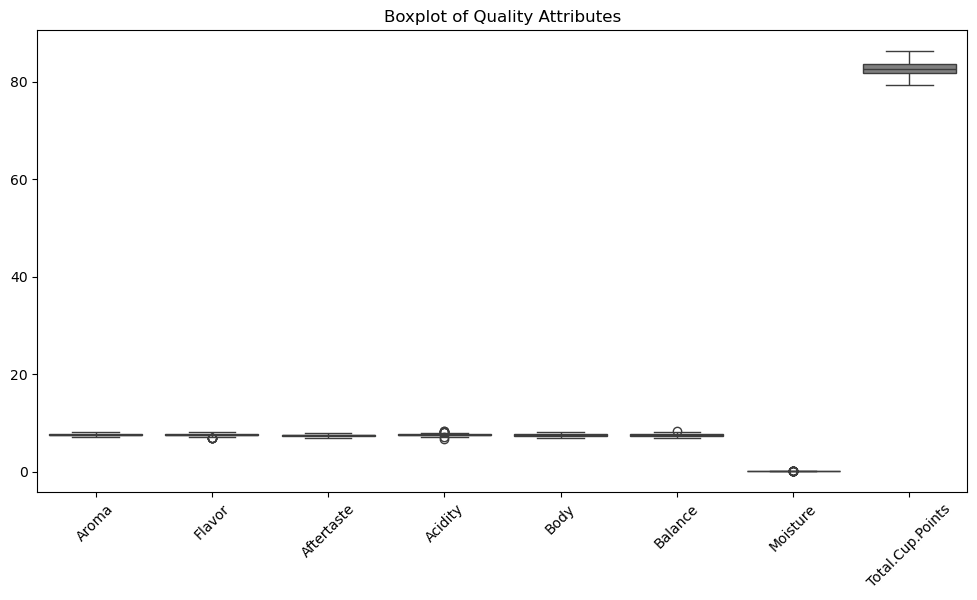

In [71]:
#2.2 univariate analysis for Quality Attributes"
quality_cols = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance','Moisture','Total.Cup.Points']

#Summary statistics
print(df[quality_cols].describe())

# quality_columns Histograms
df[quality_cols].hist(figsize=(12,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Univariate Analysis - Quality Attributes", fontsize=16)
plt.show()

# quality_columns Boxplots for see outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df[quality_cols])
plt.title("Boxplot of Quality Attributes")
plt.xticks(rotation=45)
plt.show()

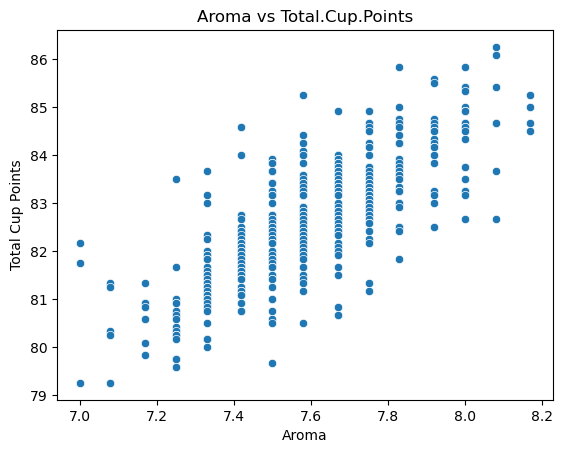

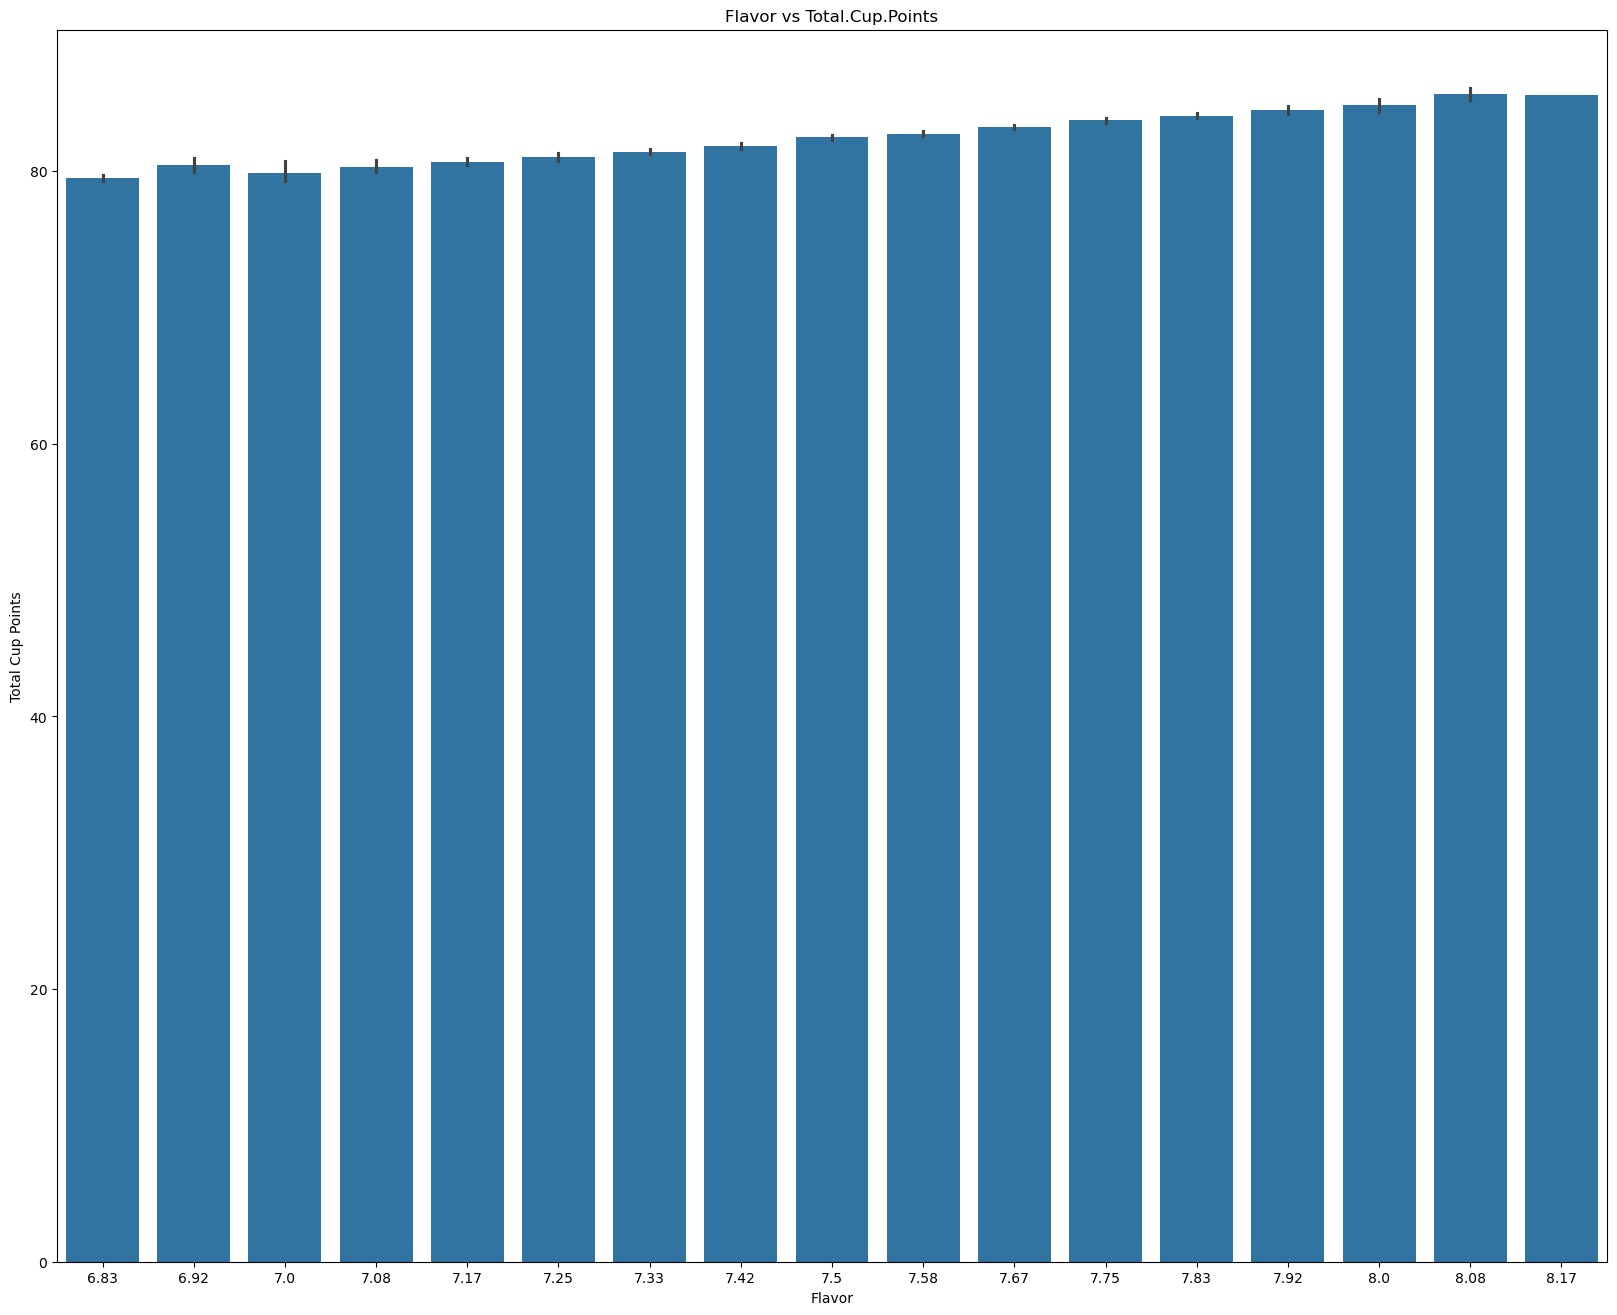

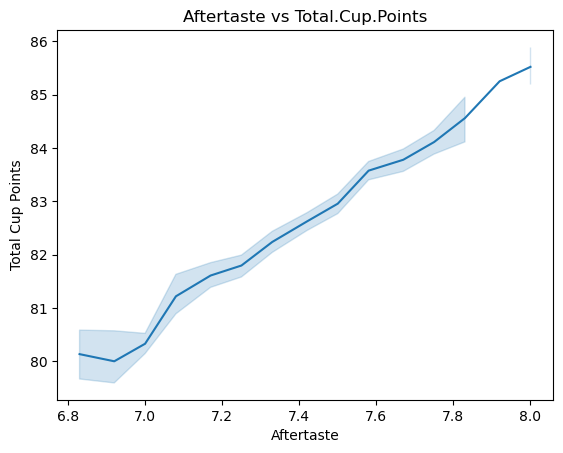

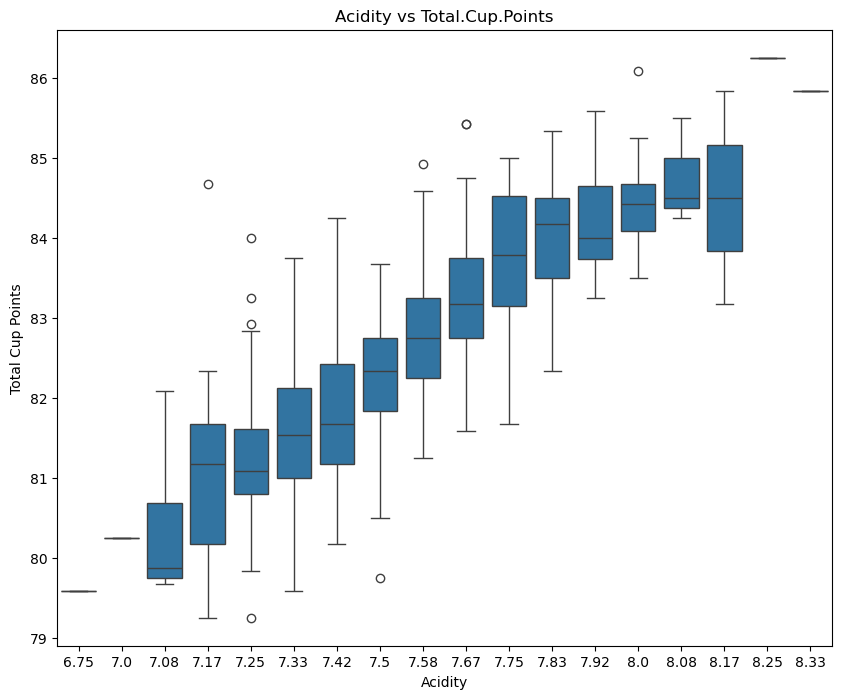

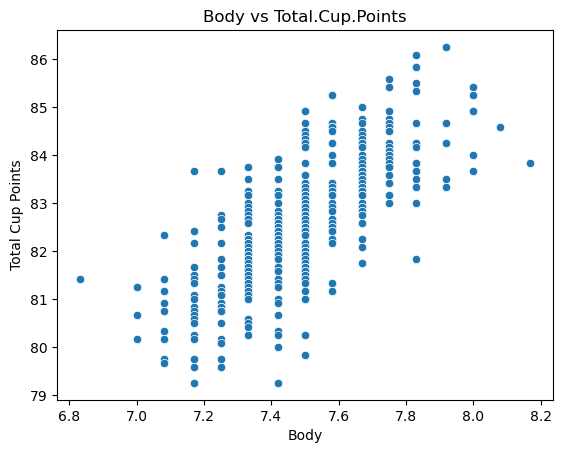

..................................................................................................


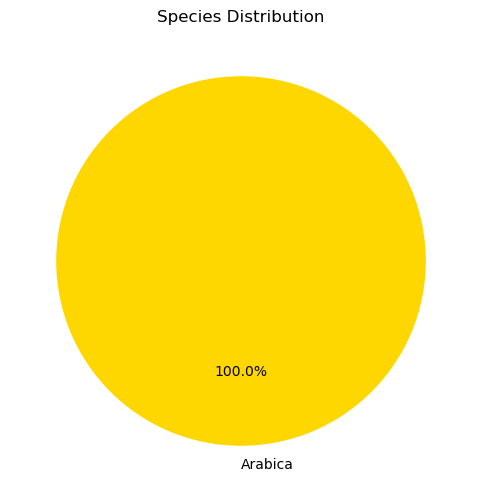

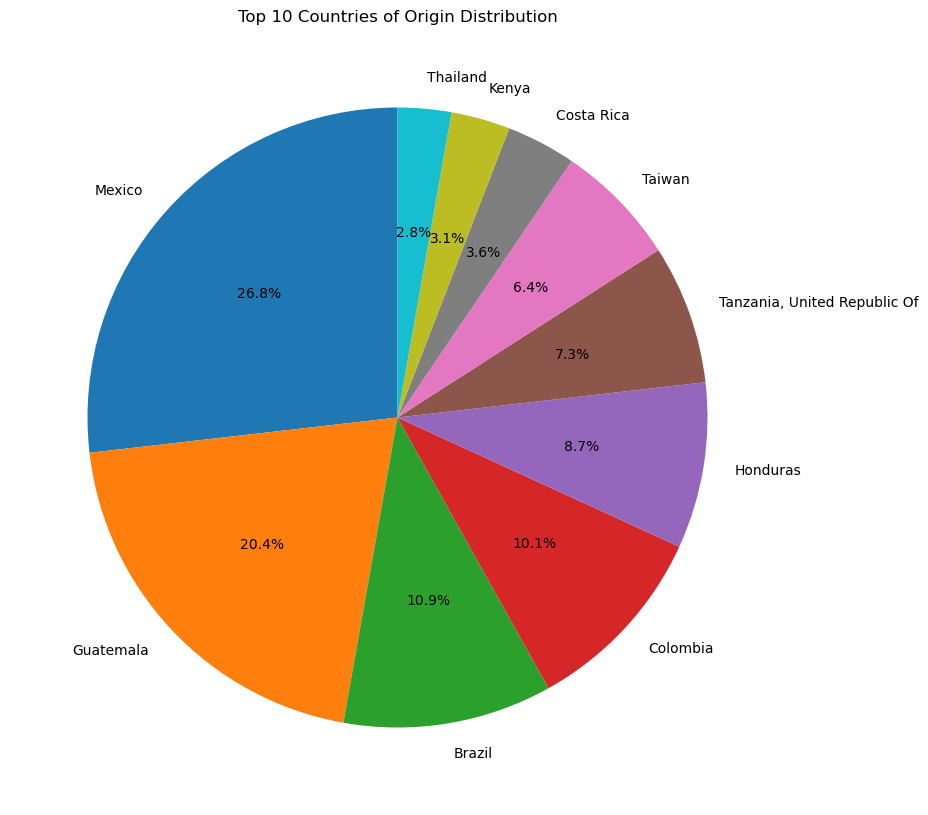

In [72]:
# Bivariate
# step 2.3 Quality attribute vs Total Quality
# 2.3.1 Aroma vs Total.Cup.Points
sns.scatterplot(x='Aroma', y='Total.Cup.Points', data=df)
plt.title('Aroma vs Total.Cup.Points')
plt.xlabel('Aroma')
plt.ylabel('Total Cup Points')
(plt.show())


#2.3.2 Flavor vs Total.Cup.Points
plt.figure(figsize=(20,16))
sns.barplot(x='Flavor', y='Total.Cup.Points', data=df)
plt.title('Flavor vs Total.Cup.Points')
plt.xlabel('Flavor')
plt.ylabel('Total Cup Points')
(plt.show())

#2.3.3 Aftertaste vs Total.Cup.Points
sns.lineplot(x='Aftertaste', y='Total.Cup.Points', data=df)
plt.title('Aftertaste vs Total.Cup.Points')
plt.xlabel('Aftertaste')
plt.ylabel('Total Cup Points')
(plt.show())

#2.3.4 Acidity vs Total.Cup.Points
plt.figure(figsize=(10,8))
sns.boxplot(x='Acidity', y='Total.Cup.Points', data=df)
plt.title('Acidity vs Total.Cup.Points')
plt.xlabel('Acidity')
plt.ylabel('Total Cup Points')
(plt.show())

#2.3.5 Body vs Total.Cup.Points
sns.scatterplot(x='Body', y='Total.Cup.Points', data=df)
plt.title('Body vs Total.Cup.Points')
plt.xlabel('Body')
plt.ylabel('Total Cup Points')
(plt.show())

print("..................................................................................................")
# species vs country of orgin
species_country = pd.crosstab(df['Country.of.Origin'], df['Species'])
plt.figure(figsize=(6,6))
df['Species'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['gold', 'lightblue']
)
plt.title("Species Distribution")
plt.ylabel("")
plt.show()

#top 10 country
top_countries = df['Country.of.Origin'].value_counts().head(10)

plt.figure(figsize=(10,12))
top_countries.plot(
    kind='pie', 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title("Top 10 Countries of Origin Distribution")
plt.ylabel("")
plt.show()

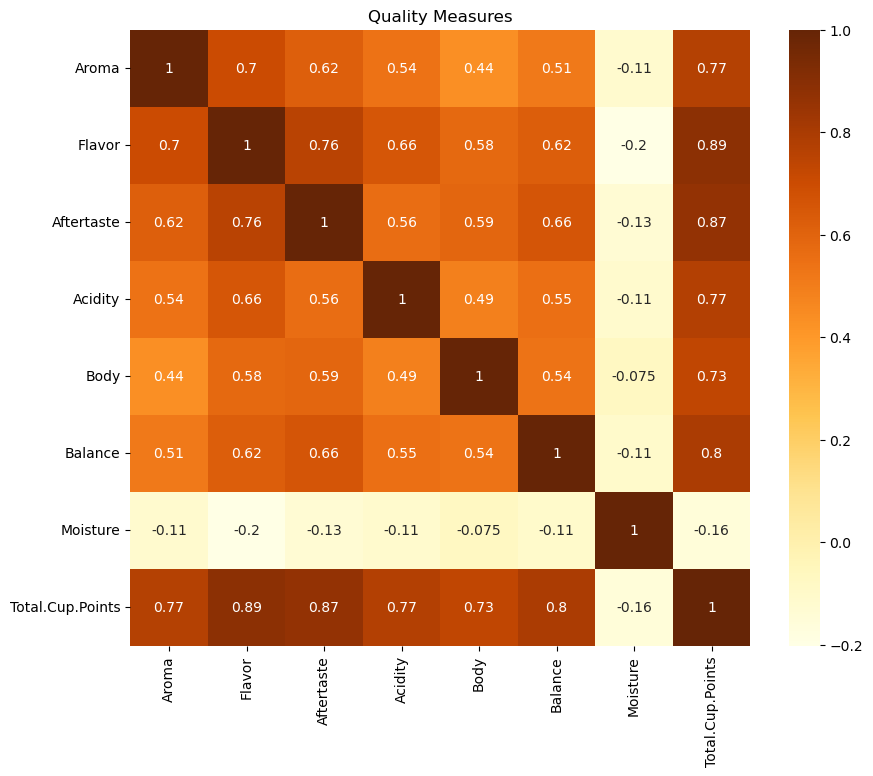

<Figure size 1000x800 with 0 Axes>

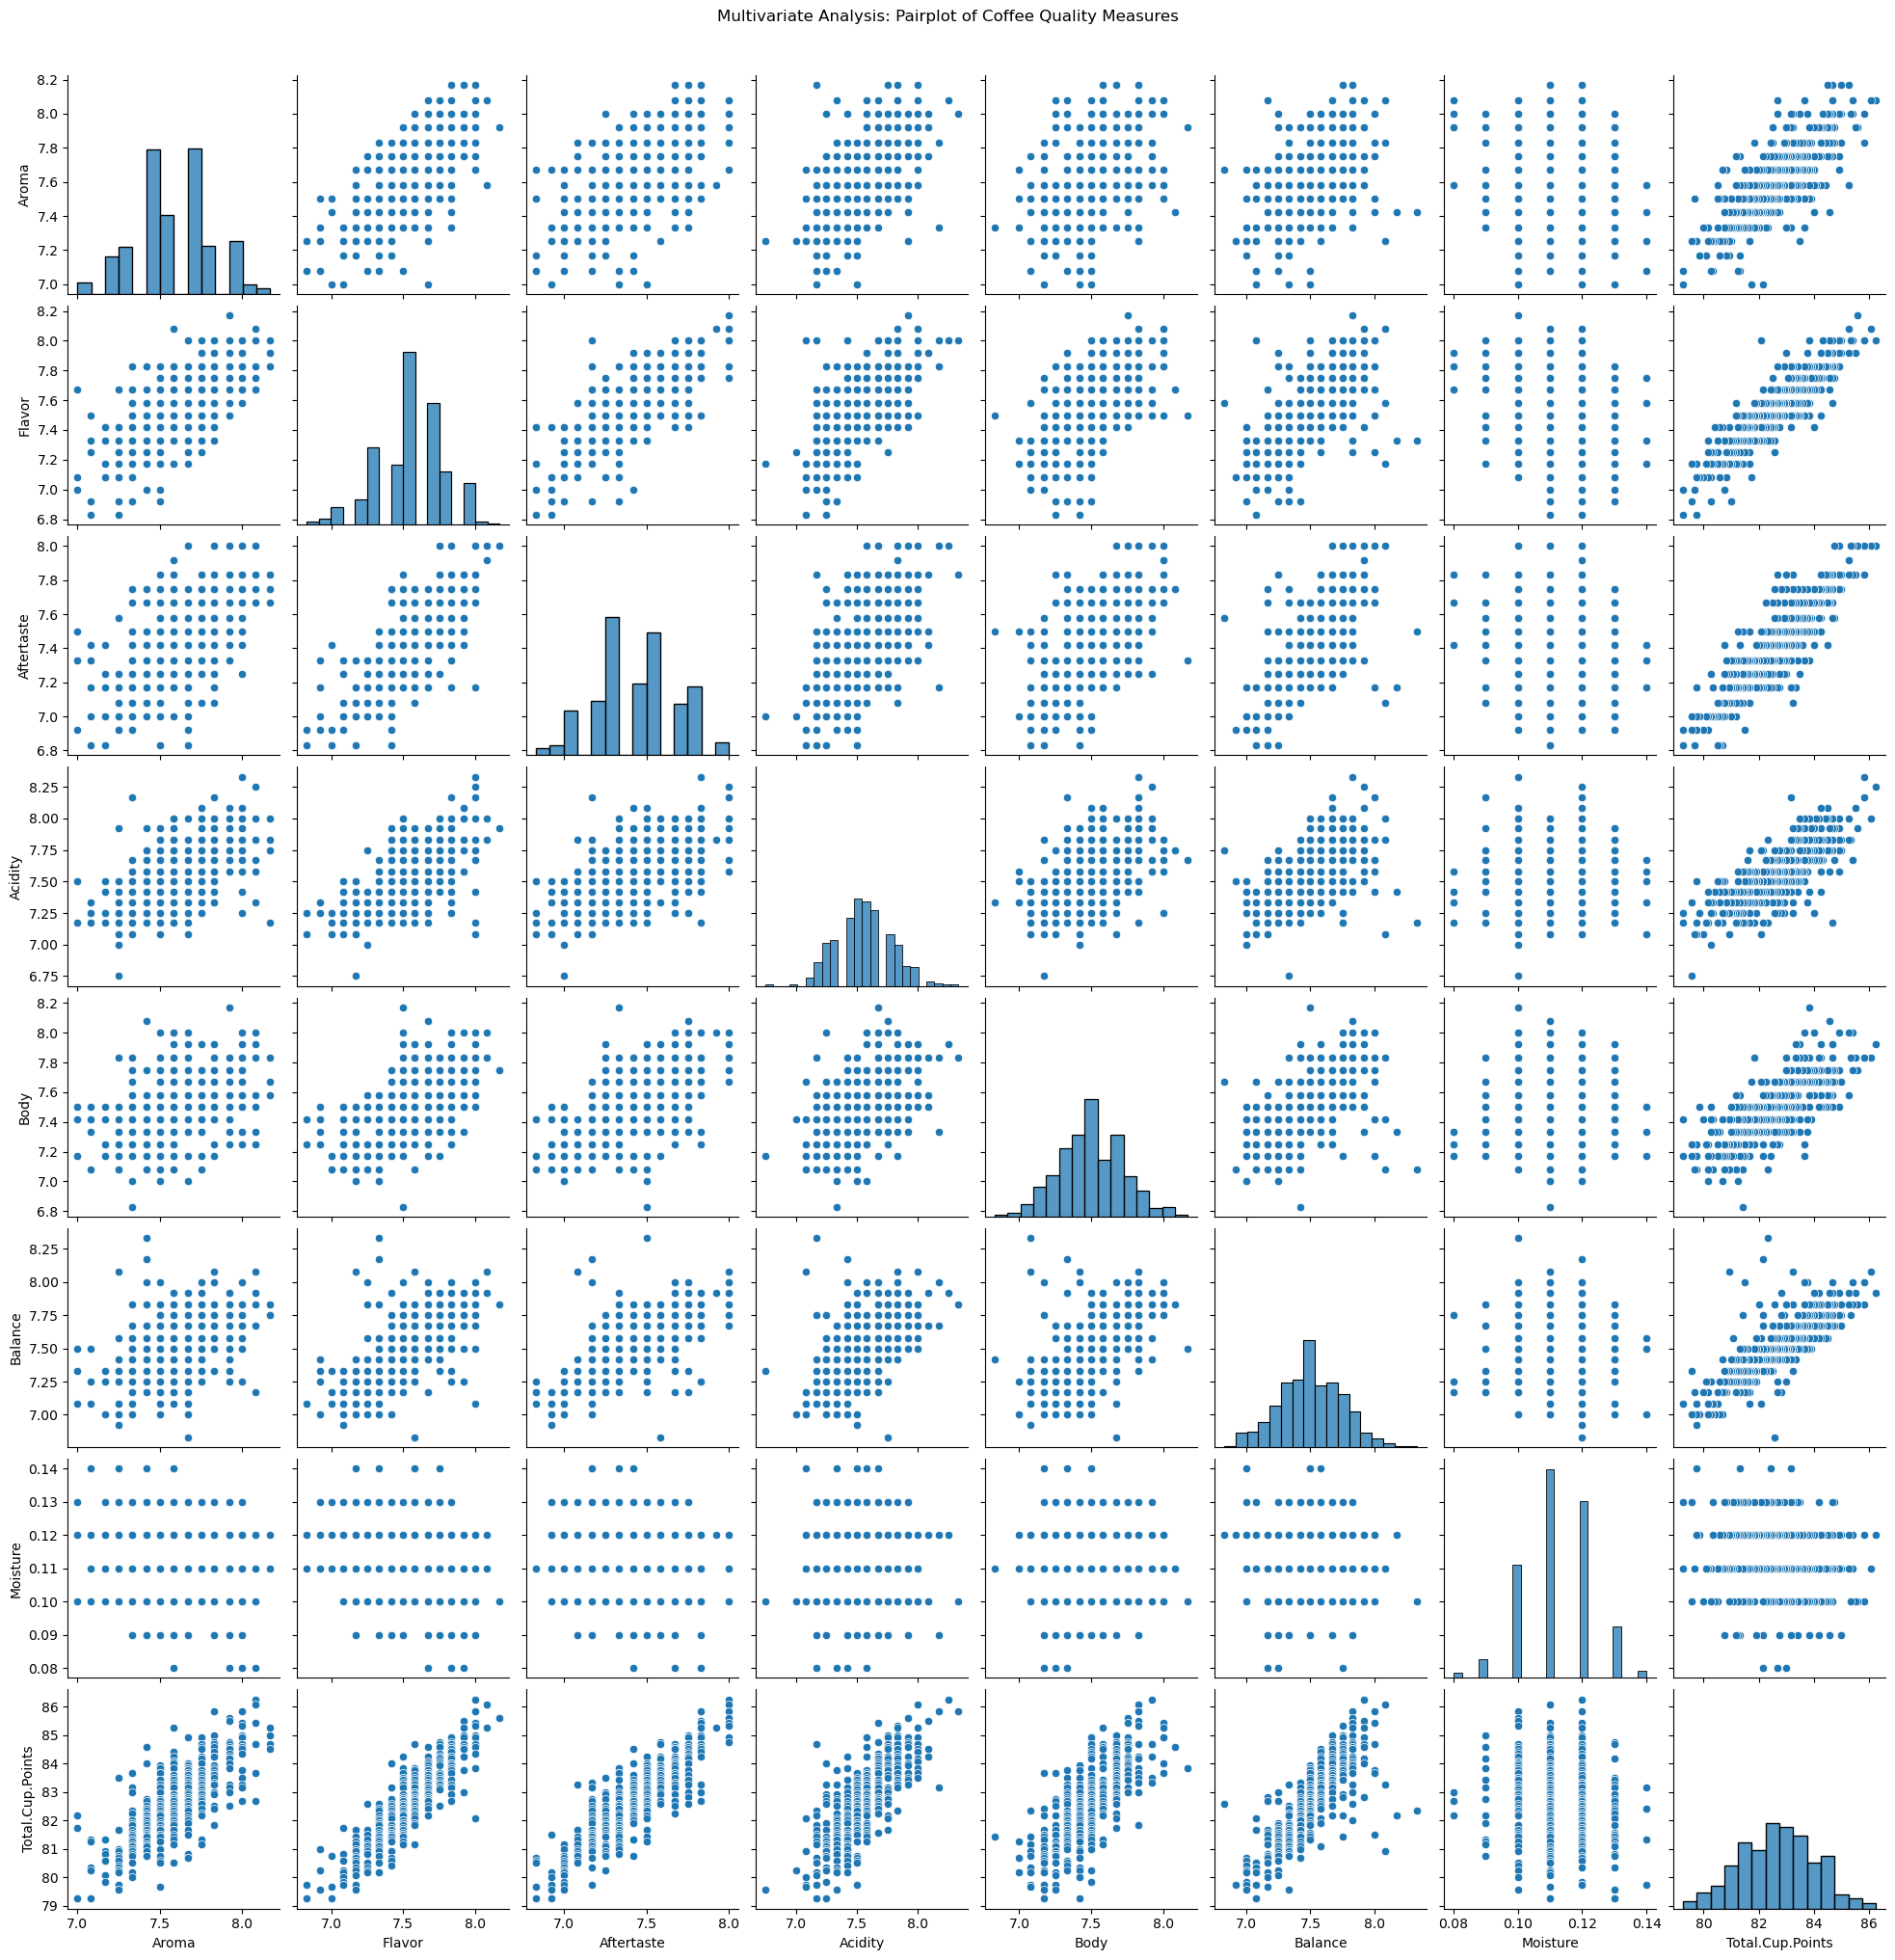

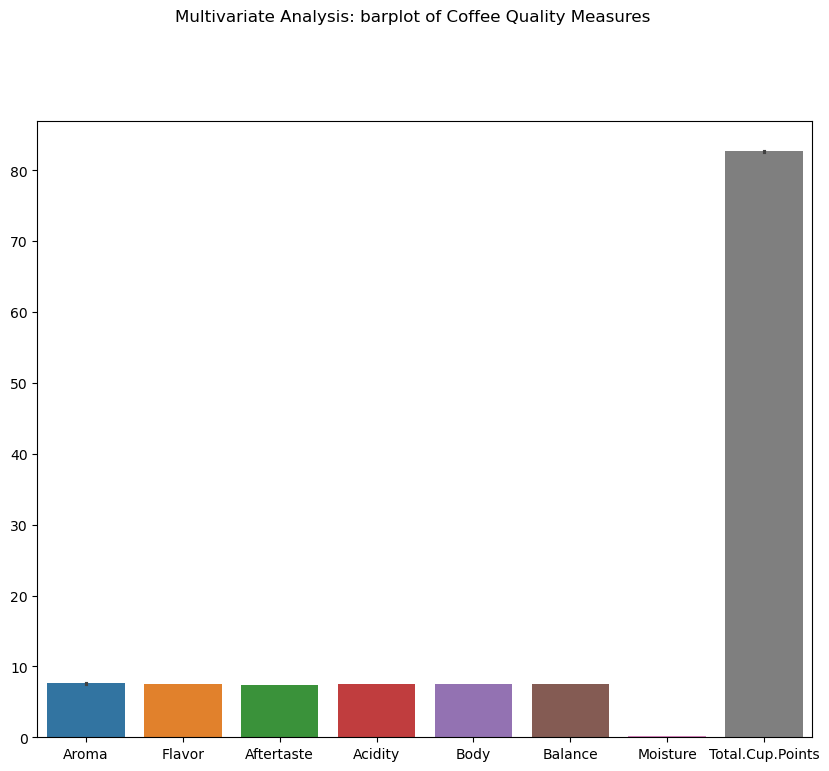

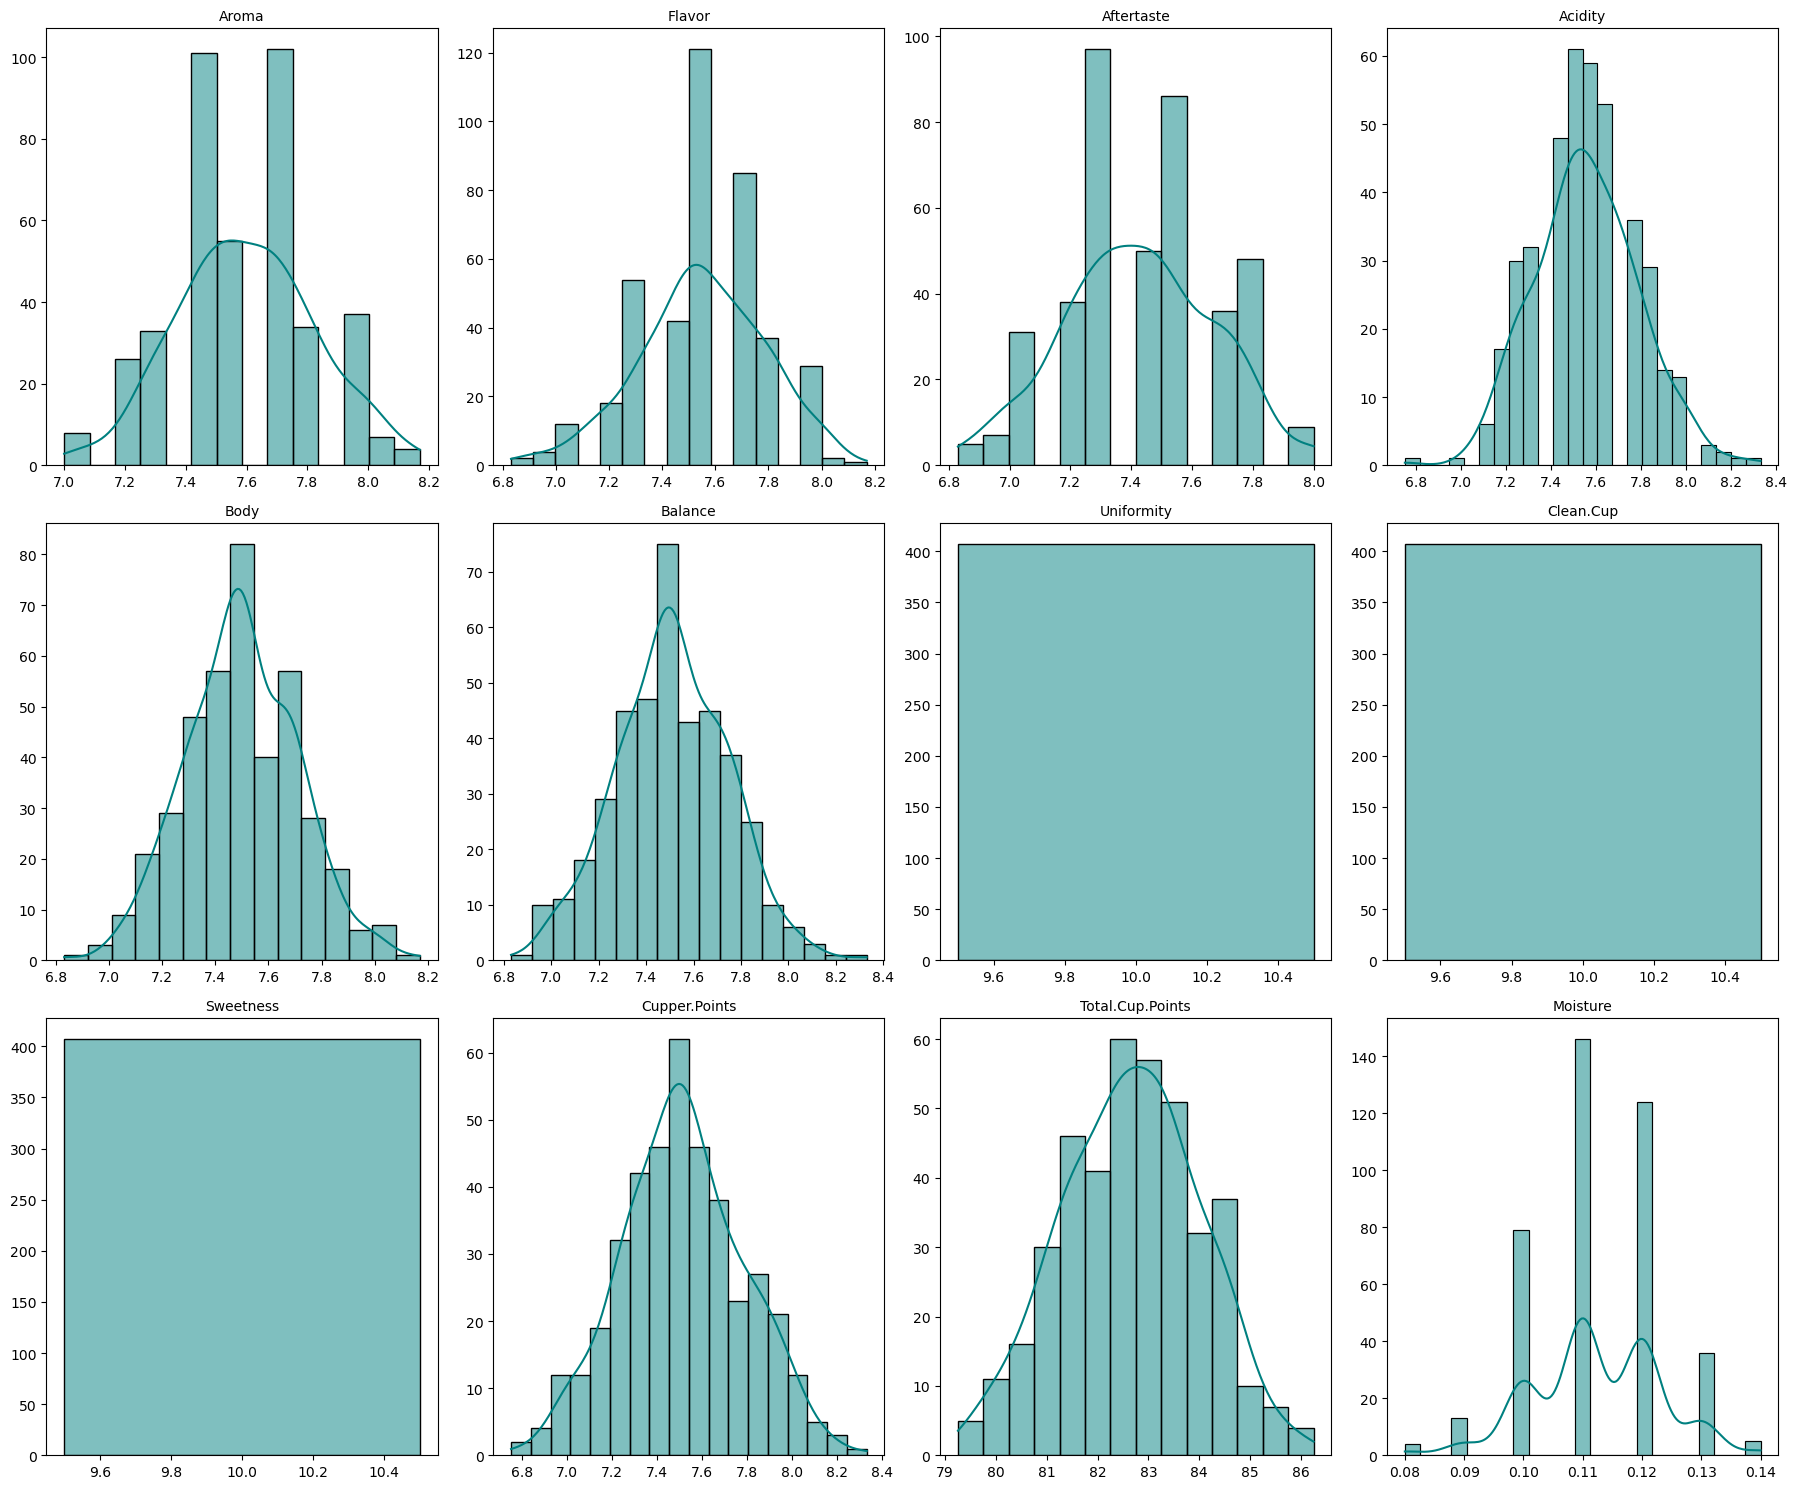

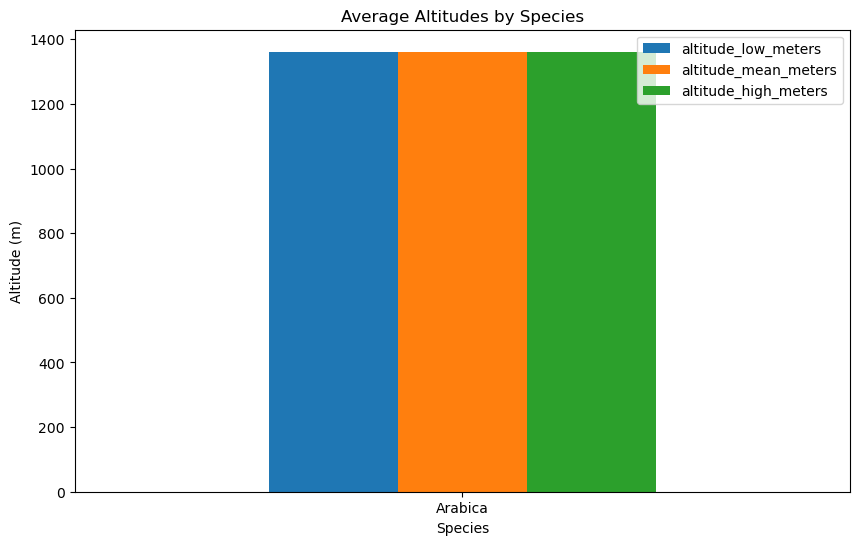

In [73]:
# MULTIVARIATE
# 2.4 Correlation Heatmap for Quality Measures
quality_cols = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance',
                'Moisture','Total.Cup.Points']

#'Uniformity','Clean.Cup','Sweetness' THESE NOT FIT HEATMAP
plt.figure(figsize=(10,8))
sns.heatmap(df[quality_cols].corr(), annot=True, cmap='YlOrBr')
plt.title("Quality Measures")
plt.show()

#2.4.1
plt.figure(figsize=(10,8))
sns.pairplot(df[quality_cols])
plt.suptitle("Multivariate Analysis: Pairplot of Coffee Quality Measures", y=1.02)
plt.show()
#2.4.2
plt.figure(figsize=(10,8))
sns.barplot(df[quality_cols])
plt.suptitle("Multivariate Analysis: barplot of Coffee Quality Measures", y=1.02)
plt.show()


#2.4.2
import matplotlib.pyplot as plt
import seaborn as sns

# Quality columns
quality_cols = ['Aroma','Flavor','Aftertaste','Acidity','Body','Balance',
                'Uniformity','Clean.Cup','Sweetness','Cupper.Points',
                'Total.Cup.Points','Moisture']

# Set up grid layout
plt.figure(figsize=(18, 15))

for i, col in enumerate(quality_cols, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'{col}', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

#2.4.3
altitude_stats = df.groupby('Species')[['altitude_low_meters','altitude_mean_meters','altitude_high_meters']].mean()

altitude_stats.plot(kind='bar', figsize=(10,6))
plt.title("Average Altitudes by Species")
plt.ylabel("Altitude (m)")
plt.xticks(rotation=0)
plt.show()

In [74]:
df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Company',
       'Altitude', 'Region', 'Producer', 'Number.of.Bags', 'Bag.Weight',
       'Harvest.Year', 'Grading.Date', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'unit_of_measurement', 'altitude_low_meters',
       'altitude_high_meters', 'altitude_mean_meters', 'altitude_range_meters',
       'altitude_avg_meters', 'species_quality_diff'],
      dtype='object')

T-test p-value: 0.0621
Fail to Reject H0 → No significant difference between Arabica and Robusta.


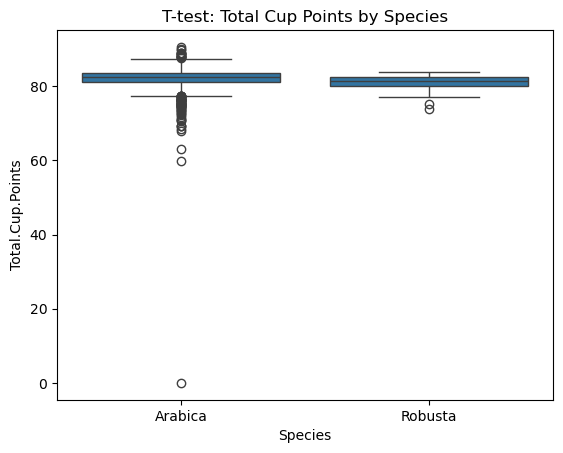

In [75]:
#3. TEST COMPARE
# 3.1 T-TEST
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = pd.read_csv("coffeeQuality.csv")

# Significance level
alpha = 0.05

# --- T-test: Total Cup Points by Species ---
arabica = df[df['Species'] == 'Arabica']['Total.Cup.Points'].dropna()
robusta = df[df['Species'] == 'Robusta']['Total.Cup.Points'].dropna()

t_stat, p_val = stats.ttest_ind(arabica, robusta)
print(f"T-test p-value: {p_val:.4f}")

if p_val < alpha:
    print("Reject H0 → Arabica and Robusta have significantly different scores.")
else:
    print("Fail to Reject H0 → No significant difference between Arabica and Robusta.")

# Visualization
sns.boxplot(x='Species', y='Total.Cup.Points', data=df)
plt.title("T-test: Total Cup Points by Species")
plt.show()

ANOVA p-value: 0.9713
Fail to Reject H0 → No significant difference among processing methods.


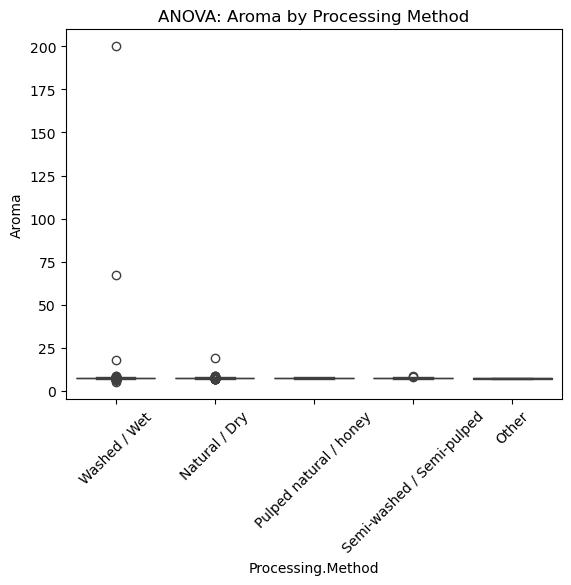

In [76]:
# 3.2 ANOVA
groups = [g['Aroma'].dropna() for _, g in df.groupby('Processing.Method')]
f_stat, p_val_anova = stats.f_oneway(*groups)
print(f"ANOVA p-value: {p_val_anova:.4f}")

if p_val_anova < alpha:
    print("Reject H0 → Processing methods have significantly different Aroma scores.")
else:
    print("Fail to Reject H0 → No significant difference among processing methods.")

# Visualization
sns.boxplot(x='Processing.Method', y='Aroma', data=df)
plt.title("ANOVA: Aroma by Processing Method")
plt.xticks(rotation=45)
plt.show()

Species vs Country.of.Origin p-value: 0.0000
Reject H0 → Significant association between Species and Country of Origin.


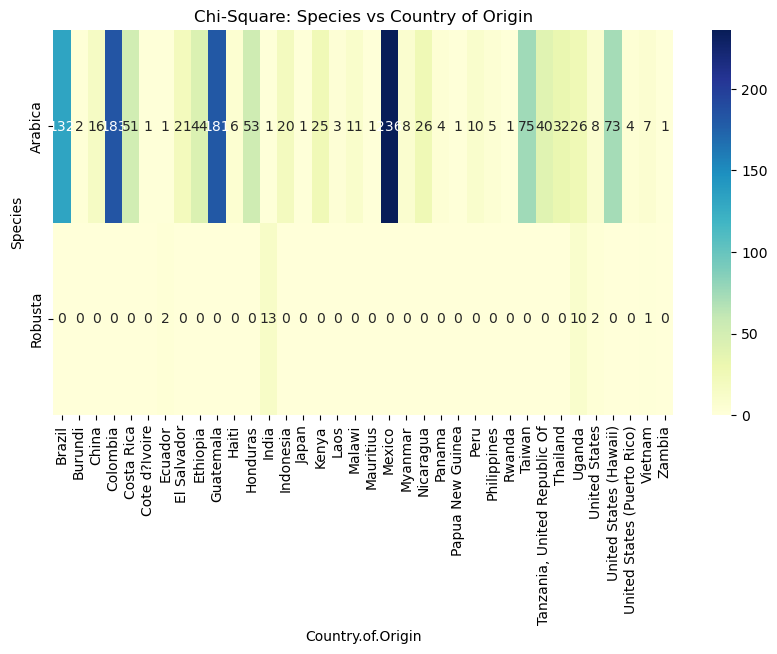

In [77]:
# 3.3 CHI SQURE
# Chi-Square: Species vs Country.of.Origin
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

table2 = pd.crosstab(df['Species'], df['Country.of.Origin'])
chi2, p, dof, ex = chi2_contingency(table2)
print(f"Species vs Country.of.Origin p-value: {p:.4f}")

if p < 0.05:
    print("Reject H0 → Significant association between Species and Country of Origin.")
else:
    print("Fail to Reject H0 → No significant association between Species and Country of Origin.")

# Visualization
plt.figure(figsize=(10, 5))
sns.heatmap(table2, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Chi-Square: Species vs Country of Origin")
plt.show()


In [78]:
"""pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(df) """

"pd.set_option('display.max_rows', None)\npd.set_option('display.max_columns', None)\n\nprint(df) "

In [80]:
df.to_csv("coffeeQuality_cleaned.csv", index=False)
